# A Standard Virus Load Function

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.



A typical virus load curve is shown bellow with the corresponding times. 

![VirusLoadCurves](figures/notebooks/VirusLoadCurves.png)



### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Virus load function

In [13]:
def VirusLoad(t, a1, a2, b1, b2, alpha, minv, maxv):
    assert all(np.array([a1, a2, b1, b2, alpha, minv, maxv]) > 0.),"parameters must be positive"
#     assert a1 < a2 < b1 < b2,"parameter must satisfy a1 < a2 < b1 < b2"
    assert minv < maxv,"parameter must satisfy minv < maxv"
    def v1(t, a1, a2, maxv):
        return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
    
    def v2(t, a1, a2, alpha):
        return 1. - np.heaviside(t - a2, 0.5) + np.heaviside(t - a2, 0.5)*np.exp(-alpha*(t - a2))
    
    def v3(t, b1, b2, minv):
        return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
    
    return (v1(t, a1, a2, maxv)*v2(t, a1, a2, alpha)*v3(t, b1, b2, minv))

The asserts guarantee that
$$
a_1 < a_2 < b_1 < b_2,
$$
and 
$$
\text{min} < \text{max}.
$$

### Fake data with random error

In [51]:
tdata = np.linspace(0, 23, 10)
v = VirusLoad(tdata, 1.49, 1.85, 5.18, 8.51, 0.16, 1e-6, 1e11)
np.random.seed(1729)
v_noise = 1e-1 * v * np.random.normal(size=tdata.size)
vdata = v + v_noise

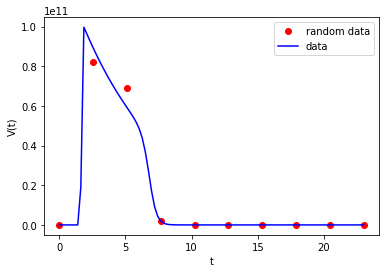

In [52]:
plt.plot(tdata, vdata, 'ro', label='random data')
ttdata = np.linspace(0, 23, 100)
plt.plot(ttdata, VirusLoad(ttdata, 1.49, 1.85, 5.18, 8.51, 0.16, 1e-6, 1e11), 'b-', label='data')
plt.xlabel('t')
plt.ylabel('V(t)')
plt.legend()
plt.show()

### Non-linear least square fit

In [53]:
print("Parameters:\n")
maxt = np.max(tdata)
minv, maxv = max(np.min(vdata),1e-5), np.max(vdata)
p0 = [0.5, 2., 15., 18., 0.2, minv, maxv]
minb = 0.
maxb = [maxt, maxt, maxt, maxt, 1.0, 1e0, 1e+13]
print("- Inital values: {}".format(p0))

popt, pcov = curve_fit(VirusLoad, tdata, vdata, p0=p0, bounds=(minb, maxb))
print("- Fitted values: {}".format(popt))

Parameters:

- Inital values: [0.5, 2.0, 15.0, 18.0, 0.2, 0.9312660556742488, 81991440079.00563]
- Fitted values: [5.67598941e-01 2.68707153e+00 1.51281751e+01 1.84030690e+01
 3.01382198e-01 9.95403225e-01 9.04854291e+10]


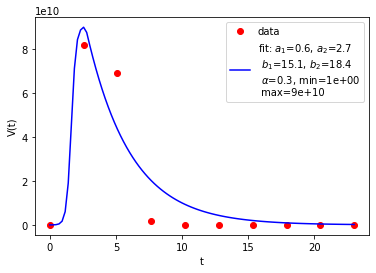

In [54]:
plt.plot(tdata, vdata, 'ro', label='data')
plt.plot(ttdata, VirusLoad(ttdata, *popt), 'b-',
         label='fit: $a_1$=%2.1f, $a_2$=%2.1f\n $b_1$=%2.1f, $b_2$=%2.1f\n $\\alpha$=%2.1f, min=%1.0e\n max=%1.0e' % tuple(popt))

plt.xlabel('t')
plt.ylabel('V(t)')
plt.legend()
plt.show()

### Initial values

Choosing the initial values is critical. Non-informative values can lead to issues in the evaluation.

Parameters:

- Inital values: [0.5, 2.0, 15.0, 18.0, 0.2, 0.9312660556742488, 81991440079.00563]
- Fitted values: [1.15e+01 1.15e+01 1.15e+01 1.15e+01 5.00e-01 5.00e-02 5.00e+09]


<ipython-input-13-16b658c9feb3>:6: RuntimeWarning: divide by zero encountered in true_divide
  return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
<ipython-input-13-16b658c9feb3>:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
<ipython-input-13-16b658c9feb3>:12: RuntimeWarning: divide by zero encountered in true_divide
  return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
<ipython-input-13-16b658c9feb3>:12: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. - (1. - minv)*(np.tanh(6.*(t - (b1 + b2)/2)/(b2 - b1)) - np.tanh(-3.*(b2 + b1)/(b2 - b1)))/2.
<ipython-input-13-16b658c9feb3>:6: RuntimeWarning: divide by zero encountered in true_divide
  return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/

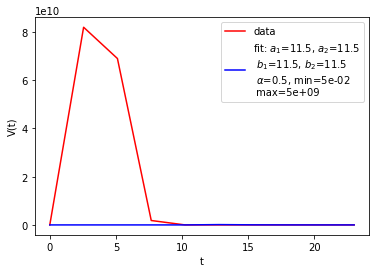

In [55]:
print("Parameters:\n")
maxt = np.max(tdata)
minv, maxv = max(np.min(vdata),1e-5), np.max(vdata)
# non informative inital values, i.e., no p0
minb = 0.
maxb = [maxt, maxt, maxt, maxt, 1.0, 1e-1, 1e+10]
print("- Inital values: {}".format(p0))

popt, pcov = curve_fit(VirusLoad, tdata, vdata, bounds=(minb, maxb))

print("- Fitted values: {}".format(popt))
plt.plot(tdata, vdata, 'r-', label='data')
plt.plot(tdata, VirusLoad(tdata, *popt), 'b-',
         label='fit: $a_1$=%2.1f, $a_2$=%2.1f\n $b_1$=%2.1f, $b_2$=%2.1f\n $\\alpha$=%2.1f, min=%1.0e\n max=%1.0e' % tuple(popt))

plt.xlabel('t')
plt.ylabel('V(t)')
plt.legend()
plt.show()

`AssertionError: parameter must satisfy a1 < a2 < b1 < b2`

We probably have `a1=a2`, or someting similar at some iteration.

It would be ideal if we automate the choice of these inital values.

For the moment they can be hand picked with eye approximation.

## Virus Load Class
Write the function and fit into a class

In [56]:
%load_ext autoreload
%autoreload 2

In [57]:
from VirusLoadFunction import VirusLoadFunction

## Data
Using data from Smith et al. (2018), *Frontier in Microbiology*.

Data was hand pincked using `PlotDigitizer`.

In [58]:
vdata = np.array([0.00000,
                  4.18551,
                  5.67816,
                  6.00515,
                  5.93640,
                  5.97712,
                  5.44716,
                  5.19848,
                  4.00515,
                  0.00000,
                  0.00000,
                  0.00000,
                  0.00000])
tdata = np.linspace(0., 12., len(vdata))

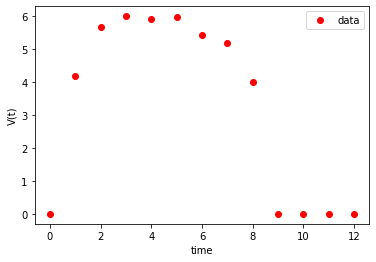

In [59]:
vl = VirusLoadFunction(tdata, vdata)
vl.Plot()

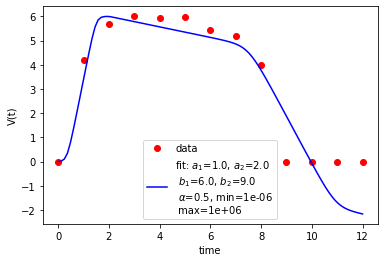

In [60]:
vl.par = np.array([1., 2., 6., 9., 0.5, 1e-6, 1e6])
vl.Plot()

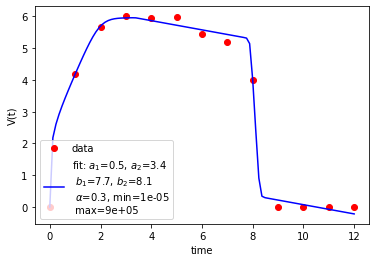

In [61]:
vl.InitialGuess(1., 2., 6., 8., 0.2, 1e-6, 1e6)
vl.Fit()
vl.Plot()

## Todo

 - There seems to be a lot of uncertainty around the minimum. Perhaps use less parameter to estimate.
     - Min and max can be easily estimated and don't need to be part of the parameter space.
 - Make a good initial empirical guess base on the shape of the graph. This could be done automatically after some smoothing.
 - Try sequencial estimation to guarantee parameters a1, a2, b1, b2 are ordered.
 - Research minimization using restrictions (e.g., a1 < a2)
 - Plot covariance
 - Get data from Authors, (Smith 2018 and Ka 2021)

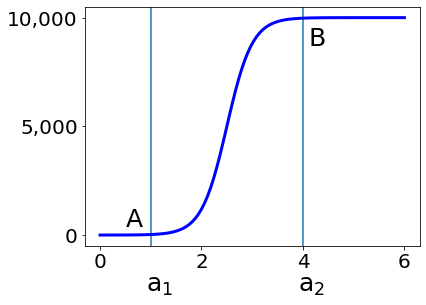

In [148]:
def v1(t, a1, a2, maxv):
    return 1. + (maxv - 1.)*(np.tanh(6.*(t - (a1 + a2)/2)/(a2 - a1)) - np.tanh(-3.*(a2 + a1)/(a2 - a1)))/2.
tdata = np.linspace(0, 6, 100)
plt.figure(figsize=(6, 4.4))
plt.plot(tdata, v1(tdata, 1, 4, 10000), 'b', lw=3)
plt.vlines(1, -1000, 12000)
plt.vlines(4, -1000, 12000)
plt.annotate( "A", [0.5, 400], fontsize=25)
plt.annotate( "B", [4.1, 8700], fontsize=25)
plt.annotate( r"a$_1$", [0.9, -2600], fontsize=25, annotation_clip=False)
plt.annotate( r"a$_2$", [3.9, -2600], fontsize=25, annotation_clip=False)
plt.ylim([-500, 10500])
plt.xticks([0, 2, 4, 6], fontsize=20)
plt.yticks([0, 5000, 10000], ["0", "5,000", "10,000"], fontsize=20)
plt.savefig("hyptan1.png", dpi=350,  bbox_inches='tight');